# Project Business Statistics: E-news Express


## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive

## Reading the Data into a DataFrame

In [ ]:
# Mount personal Google drive
root_dir = '/content/drive'
drive.mount(root_dir)

Mounted at /content/drive


In [ ]:
# Define the sub-directory where the data is located
drive_subdir = 'MyDrive/DataScienceCourse/BusinessStatistics/Project2'

# Define the name of the CSV file containing the dataset
file_name = 'abtest.csv'

# Construct the full path to the datafile
file_path = os.path.join(root_dir, drive_subdir, file_name)

# Load the datafile into a dataframe
df = pd.read_csv(file_path)

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Snoop the first few rows of the dataframe
df.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Snoop the last few rows of the dataframe
df.tail(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Get the shape of the dataframe
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 100 rows and 6 columns


In [ ]:
# Get information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Get a statistical summary of the dataframe (numeric)
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
# Get a statistical summary of the dataframe (categorical)
df.describe(include='object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [ ]:
# Check for missing values
num_missing = df.isnull().sum().sum()
print(f'The dataframe has {num_missing} missing values')

The dataframe has 0 missing values


In [ ]:
# Check for duplicate values
duplicate_rows = df.duplicated().sum()
print(f'The dataframe has {duplicate_rows} duplicate rows')

The dataframe has 0 duplicate rows


### Univariate Analysis

In [ ]:
# Plotting Constants
ALS = 12  # Axis Label Size
num_subplots = 3  # Number of subplots for base bivariate analysis plot

#### Engagement Time

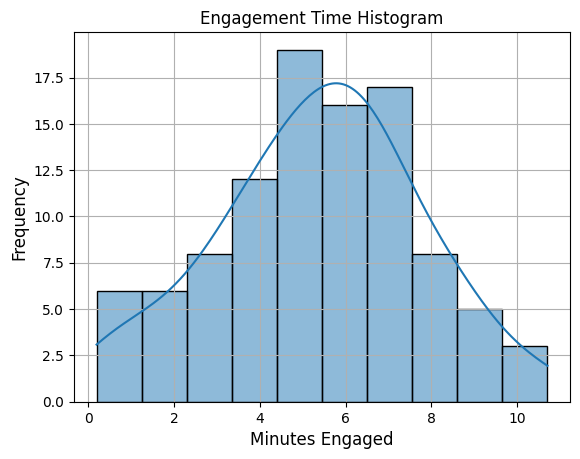

In [ ]:
# Engagement Time Histogram
sns.histplot(data=df, x='time_spent_on_the_page', bins=10, kde=True)
plt.title('Engagement Time Histogram')
plt.xlabel('Minutes Engaged', fontsize=ALS)
plt.ylabel('Frequency', fontsize=ALS)
plt.grid(True)
plt.show()

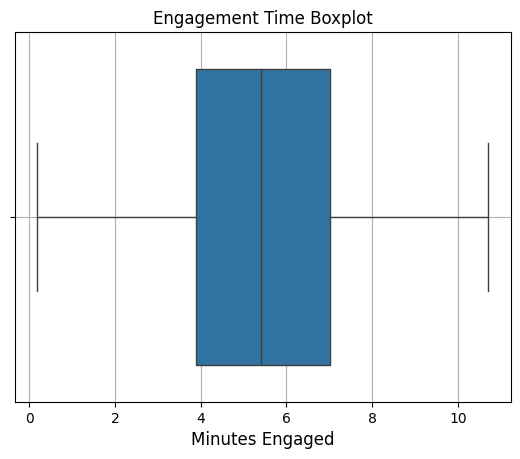

In [ ]:
# Engagement Time Boxplot
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.title('Engagement Time Boxplot')
plt.xlabel('Minutes Engaged', fontsize=ALS)
plt.grid(True)
plt.show()

#### Test Groups

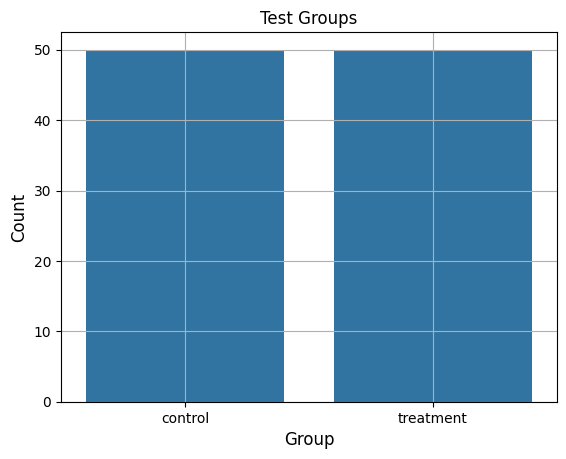

group
control      50
treatment    50
Name: count, dtype: int64


In [ ]:
# Test Group Bar Chart
sns.countplot(data=df, x='group')
plt.title('Test Groups')
plt.xlabel('Group', fontsize=ALS)
plt.ylabel('Count', fontsize=ALS)
plt.grid(True)
plt.show()

# Test Group Totals
group_counts = df['group'].value_counts()
print(group_counts)

#### Landing Page

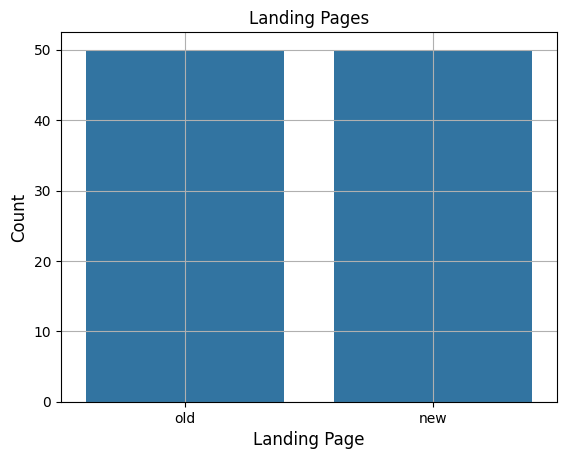

landing_page
old    50
new    50
Name: count, dtype: int64


In [ ]:
# Landing Page Bar Chart
sns.countplot(data=df, x='landing_page')
plt.title('Landing Pages', fontsize=ALS)
plt.xlabel('Landing Page', fontsize=ALS)
plt.ylabel('Count', fontsize=ALS)
plt.grid(True)
plt.show()

# Landing Page Totals
group_counts = df['landing_page'].value_counts()
print(group_counts)

#### Converted Users

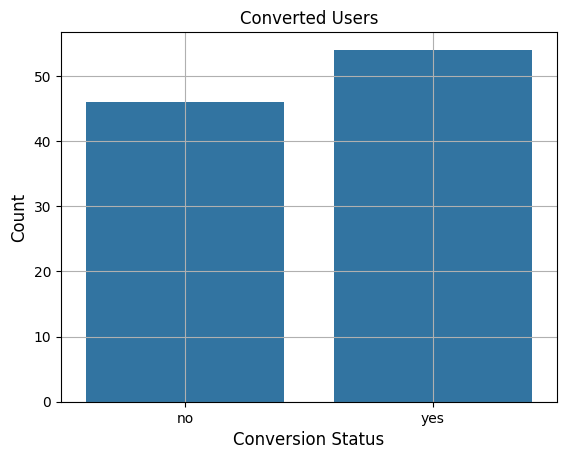

converted
yes    54
no     46
Name: count, dtype: int64


In [ ]:
# Converted User Bar Chart
sns.countplot(data=df, x='converted')
plt.title('Converted Users', fontsize=ALS)
plt.xlabel('Conversion Status', fontsize=ALS)
plt.ylabel('Count', fontsize=ALS)
plt.grid(True)
plt.show()

# Converted User Totals
group_counts = df['converted'].value_counts()
print(group_counts)

#### Preferred Language

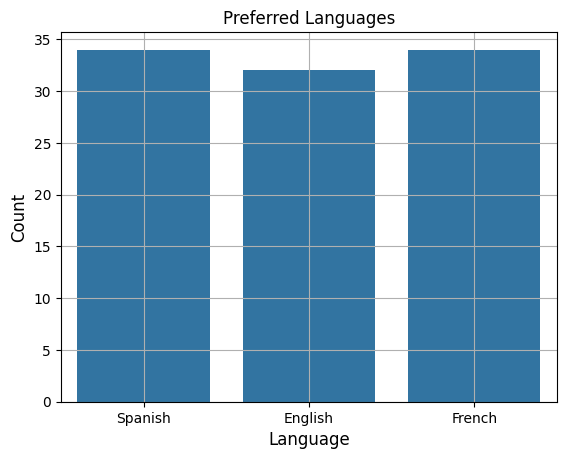

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


In [ ]:
# Preferred Language Bar Chart
sns.countplot(data=df, x='language_preferred')
plt.title('Preferred Languages')
plt.xlabel('Language', fontsize=ALS)
plt.ylabel('Count', fontsize=ALS)
plt.grid(True)
plt.show()

# Preferred Language Totals
group_counts = df['language_preferred'].value_counts()
print(group_counts)

### Bivariate Analysis

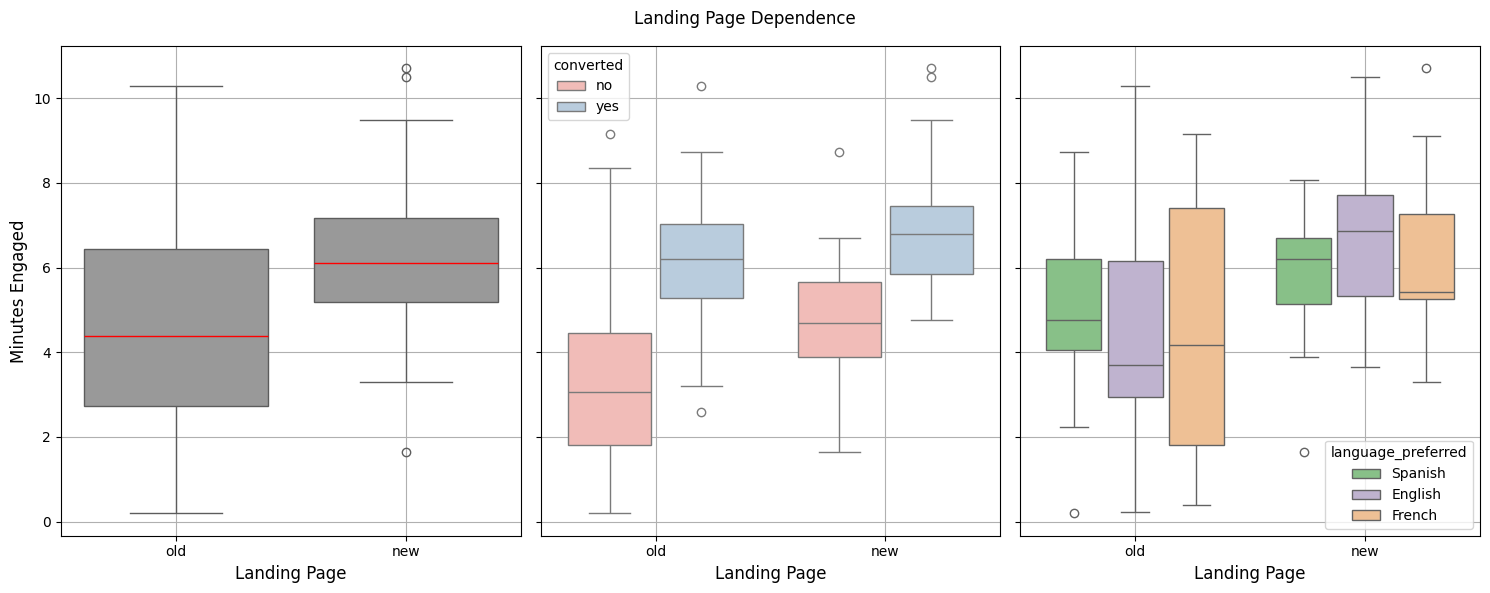

In [ ]:
# Landing Page Bivariate Dependence
fig, axes = plt.subplots(1, num_subplots, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle('Landing Page Dependence')
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', ax=axes[0], color='#999999', medianprops={"color": "r", "linewidth": 1})
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='converted', gap=0.1, ax=axes[1], palette='Pastel1')
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='language_preferred', gap=0.1, ax=axes[2], palette='Accent')
axes[0].set_ylabel('Minutes Engaged', fontsize=ALS)
for i in range(num_subplots):
  axes[i].set_xlabel('Landing Page', fontsize=ALS)
  axes[i].grid(True)
plt.tight_layout()
plt.show()

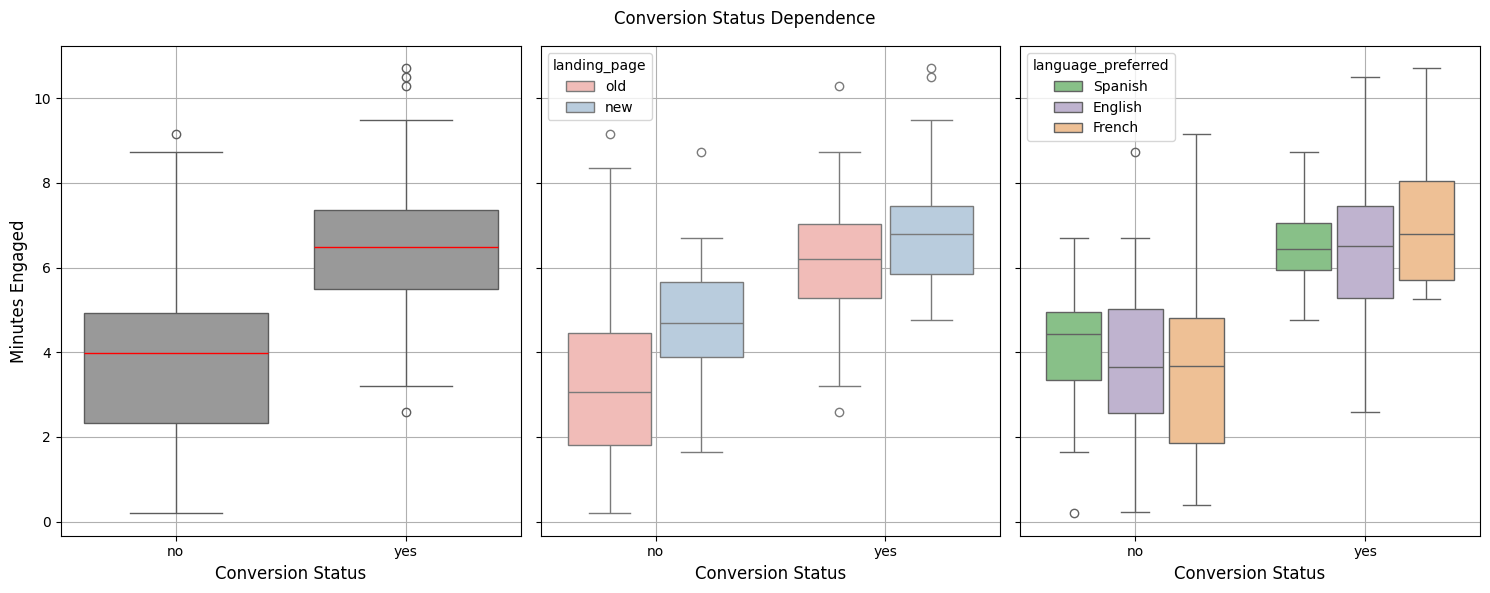

In [ ]:
# Conversion Status Bivariate Dependence
fig, axes = plt.subplots(1, num_subplots, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle('Conversion Status Dependence')
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', ax=axes[0], color='#999999', medianprops={"color": "r", "linewidth": 1})
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', hue='landing_page', gap=0.1, ax=axes[1], palette='Pastel1')
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', hue='language_preferred', gap=0.1, ax=axes[2], palette='Accent')
axes[0].set_ylabel('Minutes Engaged', fontsize=ALS)
for i in range(num_subplots):
  axes[i].set_xlabel('Conversion Status', fontsize=ALS)
  axes[i].grid(True)
plt.tight_layout()
plt.show()

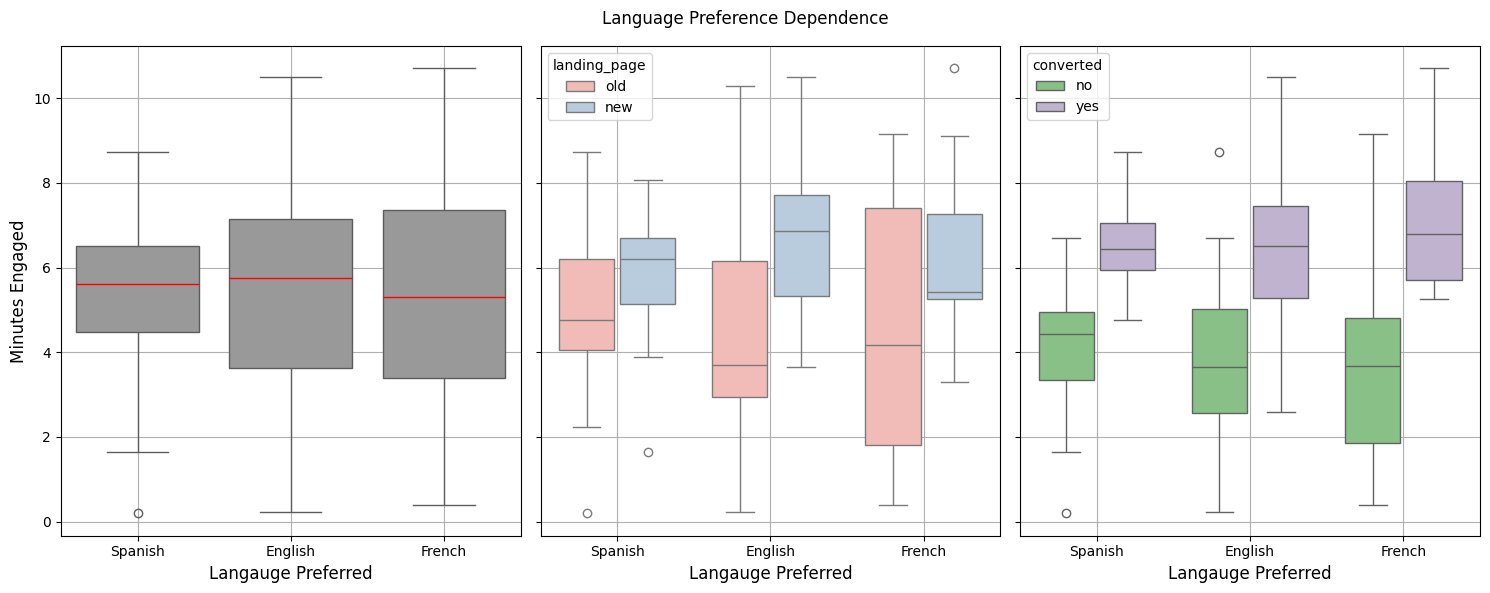

In [ ]:
# Language Preference Bivariate Dependence
fig, axes = plt.subplots(1, num_subplots, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle('Language Preference Dependence')
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', ax=axes[0], color='#999999', medianprops={"color": "r", "linewidth": 1})
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='landing_page', gap=0.1, ax=axes[1], palette='Pastel1')
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='converted', gap=0.1, ax=axes[2], palette='Accent')
axes[0].set_ylabel('Minutes Engaged', fontsize=ALS)
for i in range(num_subplots):
  axes[i].set_xlabel('Langauge Preferred', fontsize=ALS)
  axes[i].grid(True)
plt.tight_layout()
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform visual analysis

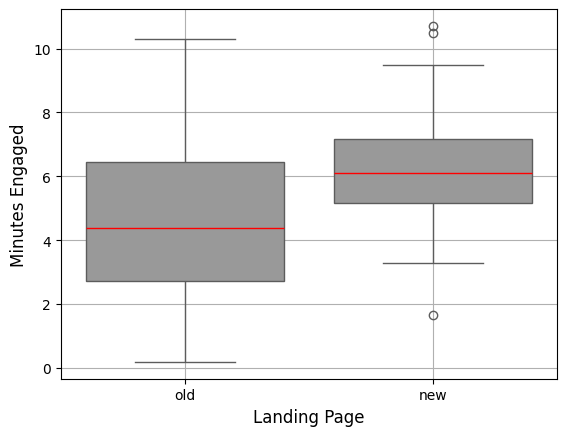

In [ ]:
# Highlight the subplot above showing landing_page vs time_spent_on_page
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', color='#999999', medianprops={"color": "r", "linewidth": 1})
plt.xlabel('Landing Page', fontsize=ALS)
plt.ylabel('Minutes Engaged', fontsize=ALS)
plt.grid(True)
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: The mean engagement times of the old and new landing pages are equal.

$H_a$: The mean engagement time of the new landing page is greater than the mean engagement time of the old landing page.

Let $\mu_{old}$ and $\mu_{new}$ be the mean engagement times of the old and new landing pages, respectively.

Mathematically, the above formulated hypotheses can be written as:

>$H_0: \mu_{new} = \mu_{old} $ <br>
$H_a: \mu_{new} > \mu_{old} $

### Step 2: Select appropriate test

We are comparing the sample means from two independent populations with unknown standard deviations. Therefore, the most appropriate test to select will be the **Two-Sample Independent T-Test**.

### Step 3: Decide the significance level
As given in the problem statement, we select $\alpha = 0.05$.

In [ ]:
# Define the significance threhsold
alpha = 0.05

### Step 4: Collect and prepare data

In [ ]:
# Create an engagement time Series for each landing page type
new_page_engagement = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_page_engagement = df[df['landing_page'] == 'old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
# Import the test from scipy
from scipy.stats import ttest_ind

# Determine if the standard deviations are roughly equal
std_new = new_page_engagement.std()
std_old = old_page_engagement.std()

# Print to console
print(f'The standard deviation of the engagement times on the NEW page is {std_new:.3f}-minutes.')
print(f'The standard deviation of the engagement times on the OLD page is {std_old:.3f}-minutes.')

The standard deviation of the engagement times on the NEW page is 1.817-minutes.
The standard deviation of the engagement times on the OLD page is 2.582-minutes.


The standard-deviations between the two samples are significantly disparate. Therefore, when we run the two-sample independent t-test we will set the *equal variances* argument to **False**.

In [ ]:
# Conduct the two-sample independent t-test
t_stat, p_value = ttest_ind(new_page_engagement, old_page_engagement, equal_var=False, alternative='greater')

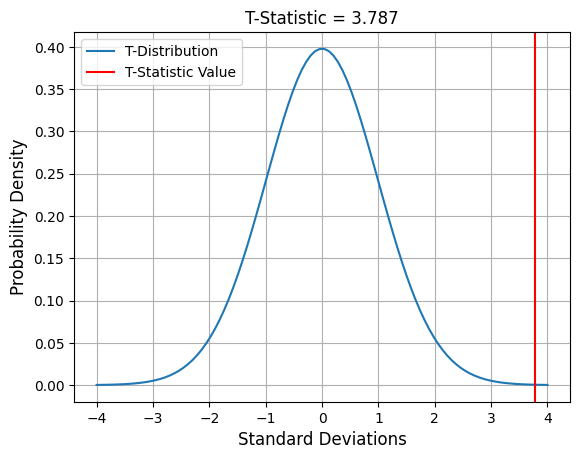

In [ ]:
# Import the t-distribution
from scipy.stats import t

# Plot the t-statistic to aid in visualizing the calculation
domain = np.linspace(-4, 4, 100)
plt.plot(domain, t.pdf(domain, df=len(df)-1), label='T-Distribution')
plt.axvline(x=t_stat, c='r', label='T-Statistic Value')
plt.xlabel('Standard Deviations', fontsize=ALS)
plt.ylabel('Probability Density', fontsize=ALS)
plt.title(f'T-Statistic = {t_stat:.3f}')
plt.legend()
plt.grid(True)
plt.show()

- The test statistic is nearly four-standard deviations above the mean
- The likihood of measuring this value is extremely low if the null hypothesis is true

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Dynamically determine whether the result of the test is statistically significant
if p_value < alpha:
    print(f'The p-value of {p_value:.7f} is less than the level of significance (α = {alpha}). Thus, we reject the null hypothesis.')
else:
    print(f'The p-value of {p_value:.7f} is greater than the level of significance (α = {alpha}). Thus, we fail to reject the null hypothesis.')

The p-value of 0.0001392 is less than the level of significance (α = 0.05). Thus, we reject the null hypothesis.


### Step 7:  Draw inference


The p-value of 0.0001392 is two orders of magnitude less than the level of significance (α = 0.05). The test statistic is about 3.8 standard deviations above the mean. Thus, we reject the null hypothesis. We have enough evidence to proport that users are spending more time on the new landing page than they are on the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform visual analysis

In [ ]:
# Create a cross table comparing Landing Page and Conversion Status
ct = pd.crosstab(df['landing_page'], df['converted'], margins=True)

# Create a calculated column for the conversion rate
ct['c_rate'] = ct['yes'] / ct['All']

# Display the table
ct

converted,no,yes,All,c_rate
landing_page,,,,
new,17,33,50,0.66
old,29,21,50,0.42
All,46,54,100,0.54


- There are 100 people in the sample
- In the new landing page group 66% subscribed
- In the old landing page group 42% subscribed

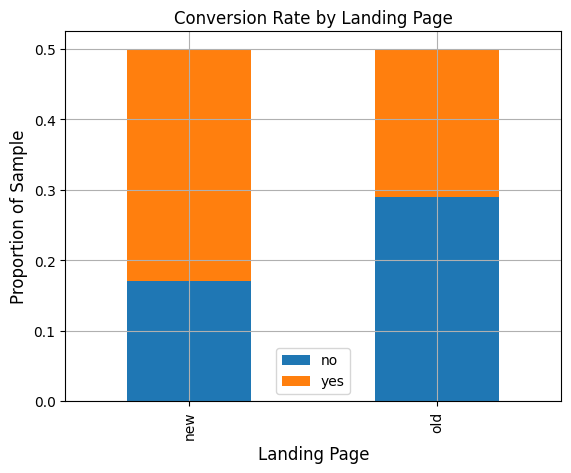

In [ ]:
# Plot the cross table as a stacked bar chart (normalized)
pd.crosstab(df['landing_page'], df['converted'], normalize=True).plot(kind='bar', stacked=True)
plt.title('Conversion Rate by Landing Page')
plt.xlabel('Landing Page', fontsize=ALS)
plt.ylabel('Proportion of Sample', fontsize=ALS)
plt.legend()
plt.grid(True)
plt.show()

- The proportion of subscribed users is higher for the new landing page than for the old landing page

### Step 1: Define the null and alternate hypotheses

$H_0$: The conversion rates of the old and new landing pages are equal.

$H_a$: The conversion rate of the new page is greater than that of the old landing page.

Let $p_{old}$ and $p_{new}$ be the conversion rates of ENews users on the old and new landing pages, respectively.

Mathematically, the above formulated hypotheses can be written as:

>$H_0: p_{new} = p_{old} $ <br>
$H_a: p_{new} > p_{old} $

### Step 2: Select appropriate test

We are comparing the sample proportions from two populations. Therefore, we select the **Two-Sample (Proportion) Z-Test**.

### Step 3: Decide the significance level

As specified in the problem statement, we select $\alpha = 0.05$

### Step 4: Collect and prepare data

In [ ]:
# Compute the number of converted users from each landing page group
new_page_conversions = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
old_page_conversions = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']

# Compute the total number of members in each landing page group
total_new = df['landing_page'].value_counts()['new']
total_old = df['landing_page'].value_counts()['old']

### Step 5: Calculate the p-value

In [ ]:
# Import the test
from statsmodels.stats.proportion import proportions_ztest

# Conduct the two-sample proportion z-test
z_stat, p_value = proportions_ztest([new_page_conversions, old_page_conversions], [total_new, total_old], alternative='larger')

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Dynamically determine whether the result of the test is statistically significant
if p_value < alpha:
    print(f'The p-value of {p_value:.7f} is less than the level of significance (α = {alpha}). Thus, we reject the null hypothesis.')
else:
    print(f'The p-value of {p_value:.7f} is greater than the level of significance (α = {alpha}). Thus, we fail to reject the null hypothesis.')

The p-value of 0.0080263 is less than the level of significance (α = 0.05). Thus, we reject the null hypothesis.


### Step 7: Draw inference

The p-value of 0.008 is less than the level of significance (α = 0.05). Thus, we reject the null hypothesis. We have enough evidence to proport that the conversion rate on the new landing page is greater than the conversion rate on the old landing page.

## 3. Are the conversion rate and preferred language independent or related?

### Perform visual analysis

In [ ]:
# Create a cross table comparing Preferred Language and Conversion Status
ct = pd.crosstab(df['language_preferred'], df['converted'], margins=True)

# Create a calculated column for the conversion rate
ct['c_rate'] = ct['yes'] / ct['All']

# Display the table
ct

converted,no,yes,All,c_rate
language_preferred,,,,
English,11,21,32,0.656250
French,19,15,34,0.441176
Spanish,16,18,34,0.529412
All,46,54,100,0.540000


- There are 100 people in the sample
- Of the users that prefer English, 65.6% subscribed
- Of the users that prefer French, 44.1% subscribed
- Of the users that prefer Spanish, 52.9% subscribed

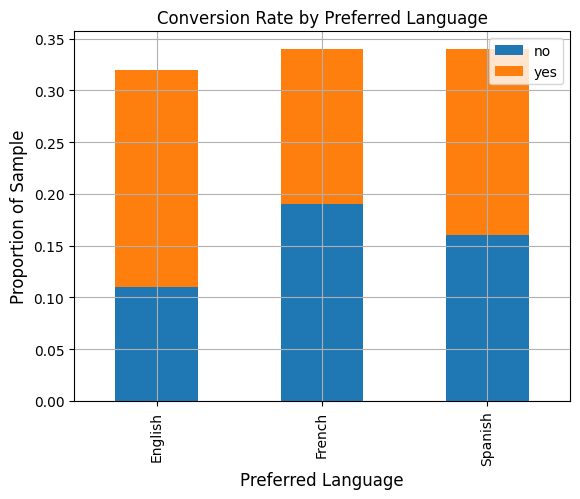

In [ ]:
# Plot the cross table as a stacked bar chart (normalized)
pd.crosstab(df['language_preferred'], df['converted'], normalize=True).plot(kind='bar', stacked=True)
plt.title('Conversion Rate by Preferred Language')
plt.xlabel('Preferred Language', fontsize=ALS)
plt.ylabel('Proportion of Sample', fontsize=ALS)
plt.legend()
plt.grid(True)
plt.show()

- The proportion of subscribed users is highest in the group which prefers the English language.
- The proportion of subscribed users is lowest in the group that prefers the French language.
- The proportion of subscribed users is nearly 50/50 in the group which prefers the Spanish language.

### Step 1: Define the null and alternate hypotheses

$H_0$: The conversion rate *does not* depend on the language preference of the user.

$H_a$: The conversion rate *does* depend on the language preference of the user.

### Step 2: Select appropriate test

We need to check whether several categorical variables from a population are independent of one another. Therefore, we select the **Chi-Square Test of Independence**.

### Step 3: Decide the significance level

As specified in the problem statement, we select $\alpha = 0.05$

### Step 4: Collect and prepare data

In [ ]:
# Create the contigency table to be used for the computation
ct = pd.crosstab(df['language_preferred'], df['converted'])

# Display the table in the notebook
ct

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
# Import the test
from scipy.stats import chi2_contingency

# Conduct the chi-squared test
chi2, p_value, dof, expected_freq = chi2_contingency(ct)

# Print the results of the test
print('Test Results')
print('------------')
print(f'Chi-Squared Statistic ... {chi2:.3f}')
print(f'Degrees of Freedom ...... {dof}')
print(f'P-Value ................. {p_value:.7f}')
print('\nExpected Frequencies')
print('--------------------')
for i in range(len(expected_freq)):
  print(f'  {expected_freq[i]}')

Test Results
------------
Chi-Squared Statistic ... 3.093
Degrees of Freedom ...... 2
P-Value ................. 0.2129889

Expected Frequencies
--------------------
  [14.72 17.28]
  [15.64 18.36]
  [15.64 18.36]


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Dynamically determine whether the result of the test is statistically significant
if p_value < alpha:
    print(f'The p-value of {p_value:.7f} is less than the level of significance (α = {alpha}). Thus, we reject the null hypothesis.')
else:
    print(f'The p-value of {p_value:.7f} is greater than the level of significance (α = {alpha}). Thus, we fail to reject the null hypothesis.')

The p-value of 0.2129889 is greater than the level of significance (α = 0.05). Thus, we fail to reject the null hypothesis.


### Step 7: Draw inference

The p-value of 0.213 is greater than the level of significance (α = 0.05). Thus, we fail to reject the null hypothesis. We do not have enough evidence to proport that the ENews user conversion rate depends on the language preferred by a given user.

## 4. Is the time spent on the new page same for the different language users?

### Perofrm visual analysis

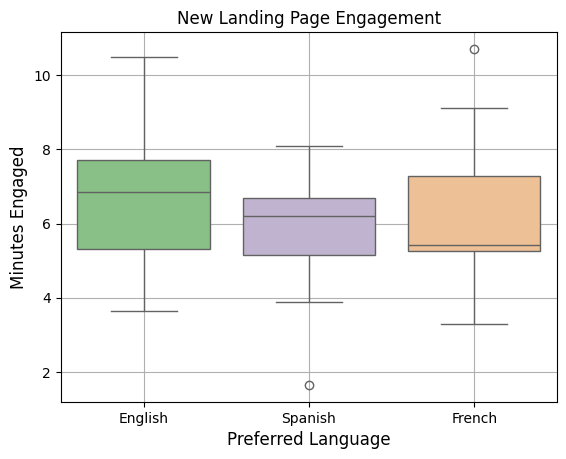


Average Engagement Times
------------------------
English:  6.664-minutes
Spanish:  5.835-minutes
 French:  6.196-minutes


In [ ]:
# Filter the dataframe to only include data from the new langing page
df_new = df[df['landing_page'] == 'new']

# Plot the time spent on the new page by different language groups
sns.boxplot(data=df_new, x='language_preferred', y='time_spent_on_the_page', hue='language_preferred', palette='Accent')
plt.title('New Landing Page Engagement')
plt.xlabel('Preferred Language', fontsize=ALS)
plt.ylabel('Minutes Engaged', fontsize=ALS)
plt.grid(True)
plt.show()

# Compute the mean engagement times of each language group
grouped_df = df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

# Display the results
print('\nAverage Engagement Times')
print('------------------------')
for language in df_new['language_preferred'].unique():
  print(f'{language.rjust(7)}:  {grouped_df[language]:.3f}-minutes')

### Step 1: Define the null and alternate hypotheses

Let $\mu_E, \mu_F, \mu_S$ be the mean engagement times of the English, French, and Spanish language preference groups, respectively.

>$H_0: \mu_E = \mu_F = \mu_S$

>$H_a: $ The mean engagement time from at least one language-preference group is different than the others.

### Step 2: Select appropriate test

We are comparing the sample means from two or more independent populations. Therefore, we select the **One-way ANOVA Test**. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

- For testing of normality, Shapiro-Wilk's test is applied to the response variable.

- For equality of variance, Levene test is applied to the response variable.

In [ ]:
# Import the Shapiro-Wilk's test
from scipy.stats import shapiro

# Run the Shapiro-Wilk's test
w_stat, p_value = shapiro(df_new['time_spent_on_the_page'])

# Print the results of the test
print('Shapiro-Wilk Test Results')
print('-------------------------')
print(f'W-Statistic ... {w_stat:.3f}')
print(f'P-Value ....... {p_value:.7f}')

Shapiro-Wilk Test Results
-------------------------
W-Statistic ... 0.986
P-Value ....... 0.8040016


Since the p-value is larger than our $\alpha$ (0.05), we fail to reject the null hypothesis that the engagement times are normally distributed. This implies that the ANOVA test results will be reliable for this situation.

In [ ]:
# Import the Levene test
from scipy.stats import levene

# Store the engagement times for each language as a Series
english_engagement = df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page']
french_engagement = df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']
spanish_engagement = df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']

# Run the Levene test
l_stat, p_value = levene(english_engagement, french_engagement, spanish_engagement)

# Print the results of the test
print('Levene Test Results')
print('-------------------')
print(f'L-Statistic ... {l_stat:.3f}')
print(f'P-Value ....... {p_value:.7f}')

Levene Test Results
-------------------
L-Statistic ... 0.774
P-Value ....... 0.4671136


Since the p-value is larger than our $\alpha$ (0.05), we fail to reject the null hypothesis that the variances are homogeneous. This, too, implies that the ANOVA test results will be reliable for this situation.

### Step 3: Decide the significance level

As specified in the problem statement, we select $\alpha = 0.05$

### Step 4: Collect and prepare data

Data has already been collected and prepared as part of the Levene test. We can reuse those same variables to execute the ANOVA test.

### Step 5: Calculate the p-value

In [ ]:
# Import the One-way ANOVA test
from scipy.stats import f_oneway

# Conduct the one-way ANOVA test
f_stat, p_value = f_oneway(english_engagement, french_engagement, spanish_engagement)

# Print the results of the test
print('One-Way ANOVA Test Results')
print('--------------------------')
print(f'F-Statistic ... {f_stat:.3f}')
print(f'P-Value ....... {p_value:.7f}')

One-Way ANOVA Test Results
--------------------------
F-Statistic ... 0.854
P-Value ....... 0.4320414


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Dynamically determine whether the result of the test is statistically significant
if p_value < alpha:
    print(f'The p-value of {p_value:.7f} is less than the level of significance (α = {alpha}). Thus, we reject the null hypothesis.')
else:
    print(f'The p-value of {p_value:.7f} is greater than the level of significance (α = {alpha}). Thus, we fail to reject the null hypothesis.')

The p-value of 0.4320414 is greater than the level of significance (α = 0.05). Thus, we fail to reject the null hypothesis.


### Step 7: Draw inference

The p-value of 0.432 is greater than the level of significance (α = 0.05). Thus, we fail to reject the null hypothesis. We do not have enough evidence to proport that the mean enagement time spent on the new landing page is different between language-preferrence groups.

## Conclusion and Business Recommendations

### Conclusions:
- We have enough evidence to proport that users are spending more time on the new landing page than they are on the old landing page.
- We have enough evidence to proport that the conversion rate on the new landing page is greater than the conversion rate of the old landing page.
- We do not have enough evidence to proport that the ENews user conversion rate depends on the language preferred by a given user.
- We do not have enough evidence to proport that the mean enagement time spent on the new landing page is different between language-preferrence groups.

### Recommendations:
It is clear from the statistical analysis that the new landing page outperforms the old landing page both in terms of mean engagement time and conversion rate. Through this analysis, we found that we cannot say with any real certainty that this has anything to do with the language preferred by the user. Therefore, it is recommended that we explore other potential factors that might have resulted in the improved performance of the new landing page. Perhaps this is due to a more visually pleasing UI/UX, a faster or more reliable back-end codebase, or more engaging content being presented to the user. We would need more data in order to test the effect of such factors.



---